In [2]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
val = ['WMT', 'FB', 'BP']
pf_dat = pd.read_csv('C:/Users/Mario/Finanzas Python/WMT_FB_BP_2014_2017.csv', index_col='Date')

In [4]:
pf_dat.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


In [5]:
pf_dat.tail()

,WMT,FB,BP
Date,,,
2017-12-06,96.769997,176.059998,39.580002
2017-12-07,96.779999,180.139999,39.310001
2017-12-08,96.550003,179.000000,39.639999
2017-12-11,96.930000,179.039993,39.930000
2017-12-12,96.699997,176.960007,40.660000


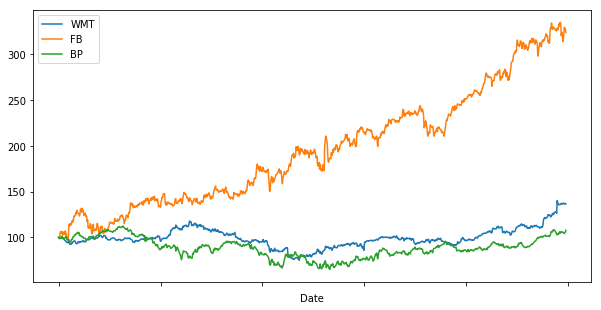

In [6]:
(pf_dat / pf_dat.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
log_rend = np.log(pf_dat / pf_dat.shift(1))

In [8]:
log_rend.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [9]:
log_rend.cov() * 250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [10]:
log_rend.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [12]:
num_val = len(val)

In [13]:
num_val

3

In [14]:
arr = np.random.random(2)
arr

array([0.16076114, 0.40238847])

In [15]:
arr[0] + arr[1]

0.5631496100308743

In [21]:
pesos = np.random.random(num_val)
pesos /= np.sum(pesos)
pesos

array([0.32889464, 0.23067624, 0.44042912])

In [22]:
pesos[0] + pesos[1] + pesos[2]

1.0

Rendimiento esperado del portafolio:

In [23]:
np.sum(pesos * log_rend.mean()) * 250

0.10210994256250328

Varianza esperada:

In [24]:
np.dot(pesos.T, np.dot(log_rend.cov() * 250, pesos))

0.024112890411392494

Volatilidad Esperada:

In [25]:
np.sqrt(np.dot(pesos.T,np.dot(log_rend.cov() * 250, pesos)))

0.15528325863206405

***

In [26]:
pfolio_rend = []
pfolio_vol = []

for x in range (1000):
    pesos = np.random.random(num_val)
    pesos /= np.sum(pesos)
    pfolio_rend.append(np.sum(pesos * log_rend.mean()) * 250)
    pfolio_vol.append(np.sqrt(np.dot(pesos.T,np.dot(log_rend.cov() * 250, pesos))))

pfolio_rend, pfolio_vol

([0.15279885729712786,
  0.2544354690775802,
  0.08149465860858668,
  0.16236888248256842,
  0.17881966894912985,
  0.09024133806917504,
  0.15394895384408497,
  0.09275303430611714,
  0.14846806127069,
  0.07518059982961922,
  0.08236432128076399,
  0.1621460650997827,
  0.03295877784932616,
  0.12524868041321754,
  0.14131264515180272,
  0.12038265667262366,
  0.14435976418602814,
  0.03841491123870548,
  0.06253984081867185,
  0.09995553739019182,
  0.2065912643689077,
  0.10188255297107088,
  0.09669100209147075,
  0.09097477009249684,
  0.16812883161933784,
  0.13463123217186518,
  0.17808479461364168,
  0.21870697948041126,
  0.14508927758000587,
  0.0968252751264612,
  0.07912784929162549,
  0.2068088334192274,
  0.10577125962021124,
  0.07537714848162949,
  0.21316963220302995,
  0.09208164191761144,
  0.10698422249308533,
  0.15573498354384718,
  0.11134887881320105,
  0.09473673368740951,
  0.10939824646510708,
  0.191070960269994,
  0.16321004151730337,
  0.15936936622503403

In [27]:
pfolio_rend = []
pfolio_vol = []

for x in range (1000):
    pesos = np.random.random(num_val)
    pesos /= np.sum(pesos)
    pfolio_rend.append(np.sum(pesos * log_rend.mean()) * 250)
    pfolio_vol.append(np.sqrt(np.dot(pesos.T,np.dot(log_rend.cov() * 250, pesos))))
    
pfolio_rend = np.array(pfolio_rend)
pfolio_vol = np.array(pfolio_vol)

pfolio_rend, pfolio_vol

(array([0.09723549, 0.13077258, 0.11004114, 0.12196526, 0.14637658,
        0.02989709, 0.15447855, 0.06291361, 0.17387277, 0.1350663 ,
        0.09058156, 0.13241681, 0.16799546, 0.0953938 , 0.05908214,
        0.08493107, 0.1184003 , 0.09119216, 0.10796237, 0.10652872,
        0.22298179, 0.17000871, 0.11414964, 0.1611094 , 0.15840224,
        0.14761011, 0.08688453, 0.11606213, 0.16798294, 0.14309121,
        0.07976583, 0.19875091, 0.14498479, 0.13474212, 0.09625154,
        0.12847584, 0.1362846 , 0.1464352 , 0.08973974, 0.21523664,
        0.16175596, 0.11259669, 0.06644411, 0.1366205 , 0.12552712,
        0.04936707, 0.1698176 , 0.11469528, 0.13892813, 0.20348927,
        0.14493972, 0.07429289, 0.14497544, 0.11615857, 0.0793667 ,
        0.11906564, 0.12288143, 0.1047525 , 0.18050825, 0.06088501,
        0.11170976, 0.08392357, 0.16222689, 0.07307015, 0.17108998,
        0.1101602 , 0.23162247, 0.10699952, 0.16297496, 0.19519406,
        0.13405987, 0.1647841 , 0.13048112, 0.08

In [28]:
portafolios = pd.DataFrame({'Rendimiento': pfolio_rend, 'Volatilidad': pfolio_vol})

In [29]:
portafolios.head()

,Rendimiento,Volatilidad
0,0.097235,0.147367
1,0.130773,0.163902
2,0.110041,0.146764
3,0.121965,0.147168
4,0.146377,0.155197


In [30]:
portafolios.tail()

,Rendimiento,Volatilidad
995,0.149785,0.159177
996,0.168545,0.164418
997,0.093574,0.165928
998,0.094504,0.144947
999,0.102460,0.146771


Text(0,0.5,'Rendimiento Esperado')

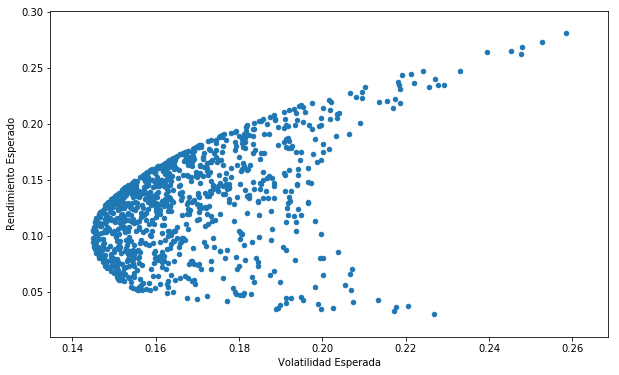

In [32]:
portafolios.plot(x='Volatilidad', y='Rendimiento', kind='scatter', figsize=(10, 6));
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento Esperado')